In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from scipy import signal
from scipy.io import wavfile

from IPython.display import Audio, display

%matplotlib inline

In [14]:
# Matplotlib settings to make the plots look a little nicer.

plt.rcParams['font.size']      = 18
plt.rcParams['font.weight']    = 'bold'
plt.rcParams['axes.grid']      = True
plt.rcParams['axes.xmargin']   = 0
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['figure.figsize'] = (10,6)

In [15]:
def play(x, fs, autoplay=False, normalize=True):
    display(Audio(x, rate=fs, autoplay=autoplay, normalize=normalize))

In [16]:
fname = 'test.wav'

# Load in the file and detect the sampling frequency
fs_wav0, wav0 = wavfile.read(fname)

# Create a time vector
t_wav0 = np.arange(len(wav0))*(1/fs_wav0)
wav0_n = wav0/(2**15)

In [17]:
# Using the sounddevice library, we can hear what the sinusoid sounds like if played as
play(wav0_n, fs_wav0, normalize=False)

In [42]:
def norm(wav):
    return wav/(1.000001*np.max(np.abs(wav)))

In [43]:
# Normalize the data
wav0_n = wav0/(np.max(np.abs(wav0))+1)
wav0_n

array([-0.00354004, -0.0039978 , -0.00436401, ...,  0.        ,
        0.        ,  0.        ])

In [44]:
wav0_n = norm(wav0)
wav0_n

array([-0.00354014, -0.00399792, -0.00436414, ...,  0.        ,
        0.        ,  0.        ])

In [46]:
wav0_n = wav0/(2**15)
wav0_n

array([-0.00354004, -0.0039978 , -0.00436401, ...,  0.        ,
        0.        ,  0.        ])

In [11]:
def plot_signal(time_vec,x_0,xlim=None,title=None):
    fig = plt.figure(figsize=(15,12))

    ax = fig.add_subplot(2,1,1)
    ax.plot(time_vec,x_0)
    ax.set_xticklabels([])
    ax.set_ylabel('x(t)')
    ax.set_xlim(xlim)
    ax.set_title(title)

    ax = fig.add_subplot(2,1,2)
    samplerate = 1./(time_vec[1]-time_vec[0])
    ax.specgram(x_0,Fs=samplerate)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Hz')
    ax.set_xlim(xlim)

    fig.tight_layout()
    plt.show()
    plt.close(fig)

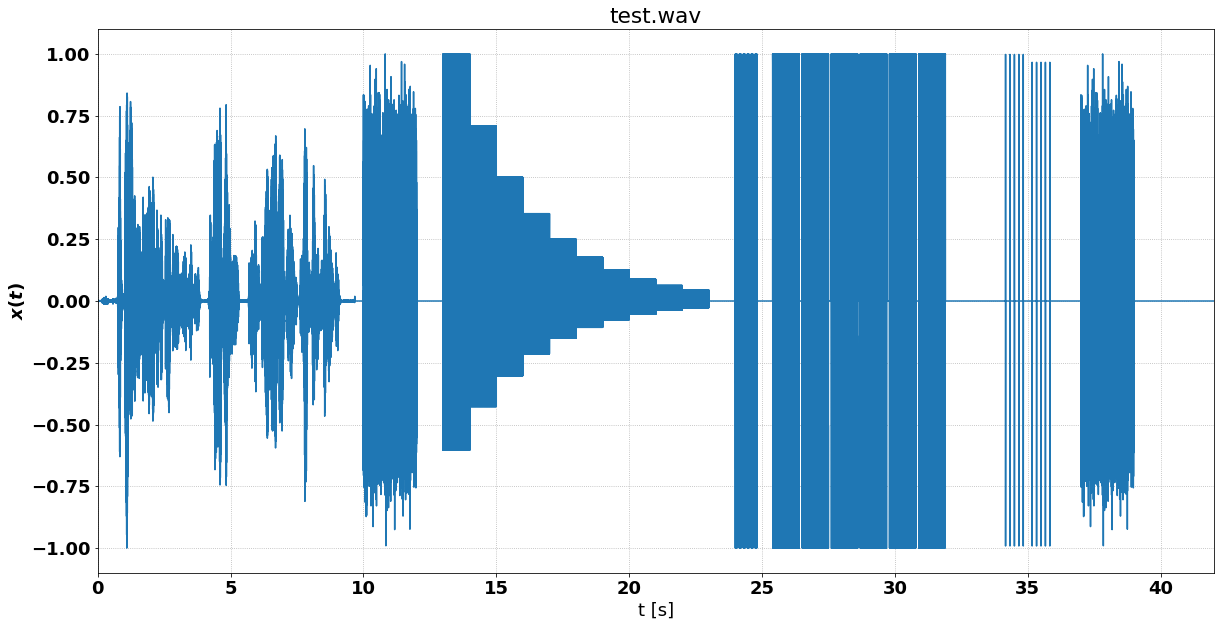

In [8]:
fig = plt.figure(figsize=(20,10))

ax  = fig.add_subplot(1,1,1)
ax.plot(t_wav0,wav0_n)
ax.set_xlabel('t [s]')
ax.set_ylabel('$x(t)$')
ax.set_title(fname)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


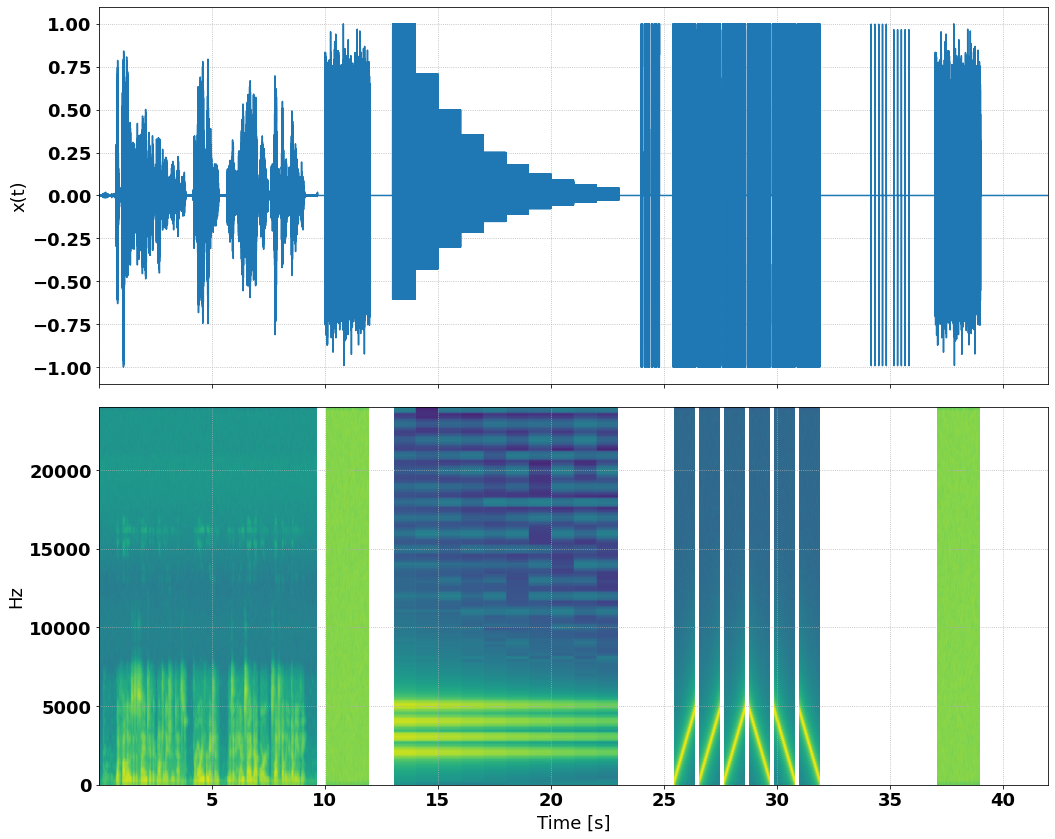

In [12]:
plot_signal(t_wav0,wav0_n)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


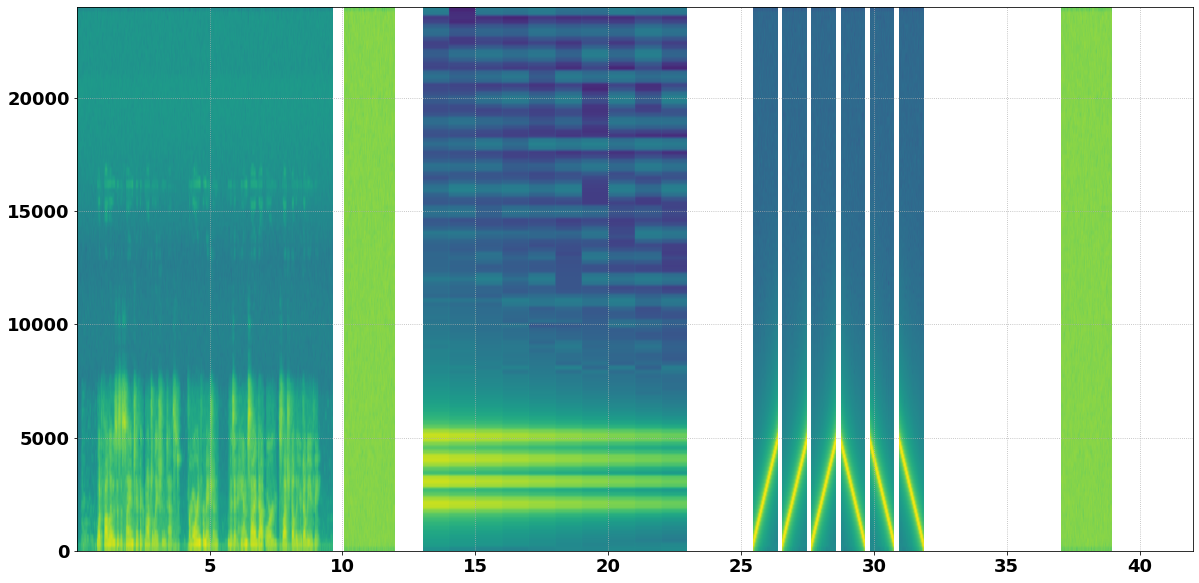

In [9]:
fig = plt.figure(figsize=(20,10))

plt.specgram(wav0_n,Fs=fs_wav0)
plt.show()

# Draft Works Below

## AM Modulation

In [6]:
N   = 2**18  # Number of Points in Signal
Fs  = 2**14  # Sampling Frequency in samples/second
Ts  = 1./Fs  # Sampling Period

In [7]:
fc  = 1000 # Carrier Frequency is 1 kHz
fm  = 100  # Message frequency is 100 Hz
Ac  = 10   # Carrier amplitude is 10

In [8]:
mu1 = 0.5  #  50% AM Modulation

In [9]:
# Generate time vector
t   = np.arange(N)*Ts

# Generate frequency vector
f   = np.linspace(-Fs/2,Fs/2,N)

## Generate Signals and Calculate Spectra

In [10]:
# Generate Signals
x      = np.cos(2*np.pi*fm*t)     # Message Signal
xc     = Ac*np.cos(2*np.pi*fc*t)  # Carrier Signal
xc_am1 = (1+mu1*x)*xc             # Modulated AM Signal

In [11]:
# Calculate Spectra
Xc_am1 = np.fft.fftshift(np.fft.fft(xc_am1)/N)

## Plot Signals and Spectra

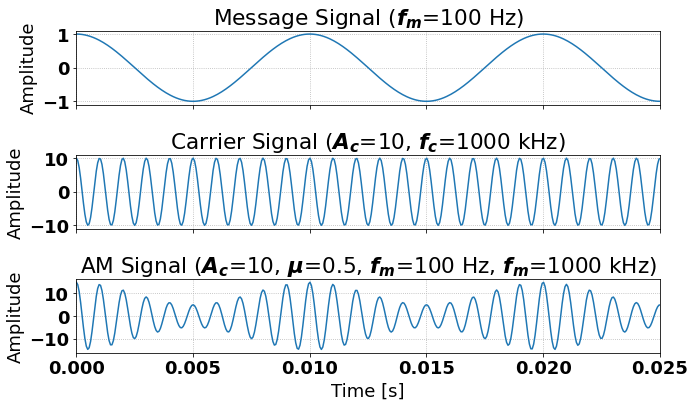

In [12]:
fig = plt.figure()

ax  = fig.add_subplot(3,1,1)
ax.plot(t,x)
ax.set_xlim(0,0.025)
ax.set_xticklabels([])
ax.set_ylabel('Amplitude')
ax.set_title('Message Signal ($f_m$={!s} Hz)'.format(fm))

ax  = fig.add_subplot(3,1,2)
ax.plot(t,xc)
ax.set_xlim(0,0.025)
ax.set_xticklabels([])
ax.set_ylabel('Amplitude')
ax.set_title('Carrier Signal ($A_c$={!s}, $f_c$={!s} kHz)'.format(Ac,fc))

ax  = fig.add_subplot(3,1,3)
ax.plot(t,xc_am1)
ax.set_xlim(0,0.025)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('AM Signal ($A_c$={!s}, $\mu$={!s}, $f_m$={!s} Hz, $f_m$={!s} kHz)'.format(Ac,mu1,fm,fc))

fig.tight_layout()
plt.show()

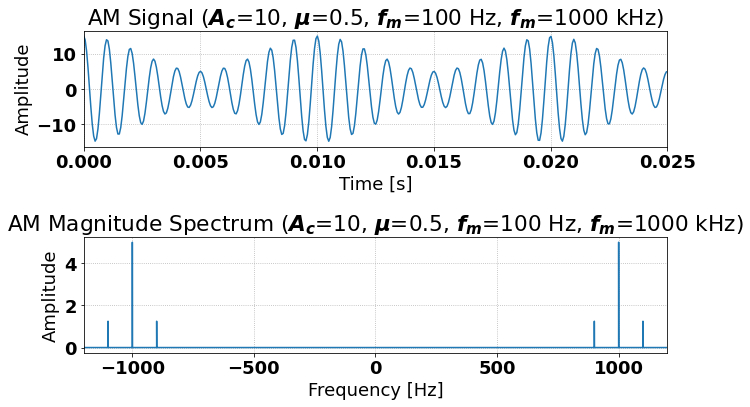

In [13]:
fig = plt.figure()

ax  = fig.add_subplot(2,1,1)
ax.plot(t,xc_am1)
ax.set_xlim(0,0.025)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('AM Signal ($A_c$={!s}, $\mu$={!s}, $f_m$={!s} Hz, $f_m$={!s} kHz)'.format(Ac,mu1,fm,fc))

ax  = fig.add_subplot(2,1,2)
ax.plot(f,np.abs(Xc_am1))
ax.set_xlim(-1200,1200)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.set_title('AM Magnitude Spectrum ($A_c$={!s}, $\mu$={!s}, $f_m$={!s} Hz, $f_m$={!s} kHz)'.format(Ac,mu1,fm,fc))

fig.tight_layout()
plt.show()